In [1]:
library(data.table)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### FUSION
- EUR only (N=285)
- using TOPMED imputed genotype
- susie, top1, elastic net
- 1e6 cis window
- **not extracting 1kg LDREF variants**

In [2]:
hsq <- fread("gene_eur_concat.hsq", data.table = F)

In [3]:
dim(hsq)

[1] 30774     4

In [3]:
# NAs are GCTA not converging, skipping those features
dim(hsq[complete.cases(hsq),])

[1] 29255     4

In [4]:
hsq <- hsq %>% filter(complete.cases(hsq))

In [7]:
head(hsq)

,V1,V2,V3,V4
,<chr>,<dbl>,<dbl>,<dbl>
1,./WEIGHTS/ENSG00000140479,-0.055509,0.035026,1.1879e-01
2,./WEIGHTS/ENSG00000286733,0.086395,0.071297,6.7509e-02
3,./WEIGHTS/ENSG00000252614,-0.043682,0.032127,1.3355e-01
4,./WEIGHTS/ENSG00000184277,0.234826,0.079374,1.4563e-06
5,./WEIGHTS/ENSG00000185418,0.154647,0.067470,7.1501e-05
6,./WEIGHTS/ENSG00000259658,0.095547,0.065145,1.8677e-02


In [5]:
colnames(hsq) <- c("gene","h2","se","pval")

In [24]:
p <- ggplot(hsq, aes(x=h2)) +
    geom_histogram(binwidth=0.01, color="black", fill="white") +
    theme_bw() +
    labs(x="h2", y="Gene count") +
    theme(axis.text = element_text(size=12),
          axis.title = element_text(size=14))


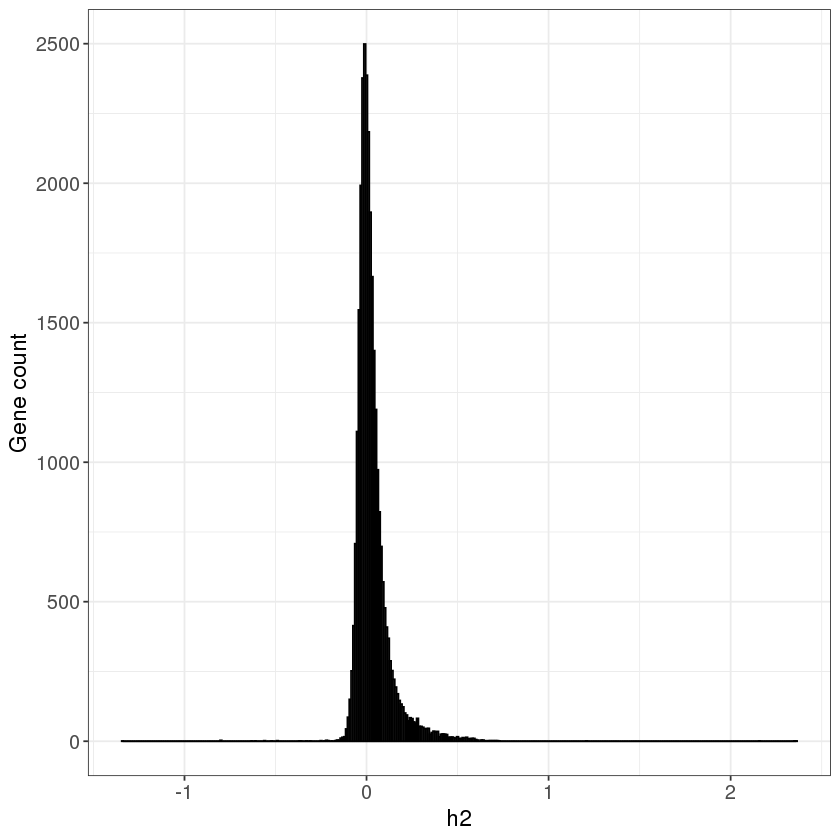

In [25]:
p

In [14]:
range(hsq$h2)

[1] -1.336477  2.357887

In [17]:
# sig pval, positive h2 gene list
sig <- hsq %>% filter(pval < .05, h2 > 0) %>% select(gene)

In [18]:
head(sig)

,gene
,<chr>
1,./WEIGHTS/ENSG00000184277
2,./WEIGHTS/ENSG00000185418
3,./WEIGHTS/ENSG00000259658
4,./WEIGHTS/ENSG00000259660
5,./WEIGHTS/ENSG00000231439
6,./WEIGHTS/ENSG00000161981


In [19]:
dim(sig)

[1] 5108    1

In [20]:
hsq_subset <- hsq %>% filter(gene %in% sig$gene)

In [21]:
dim(hsq_subset)

[1] 5108    4

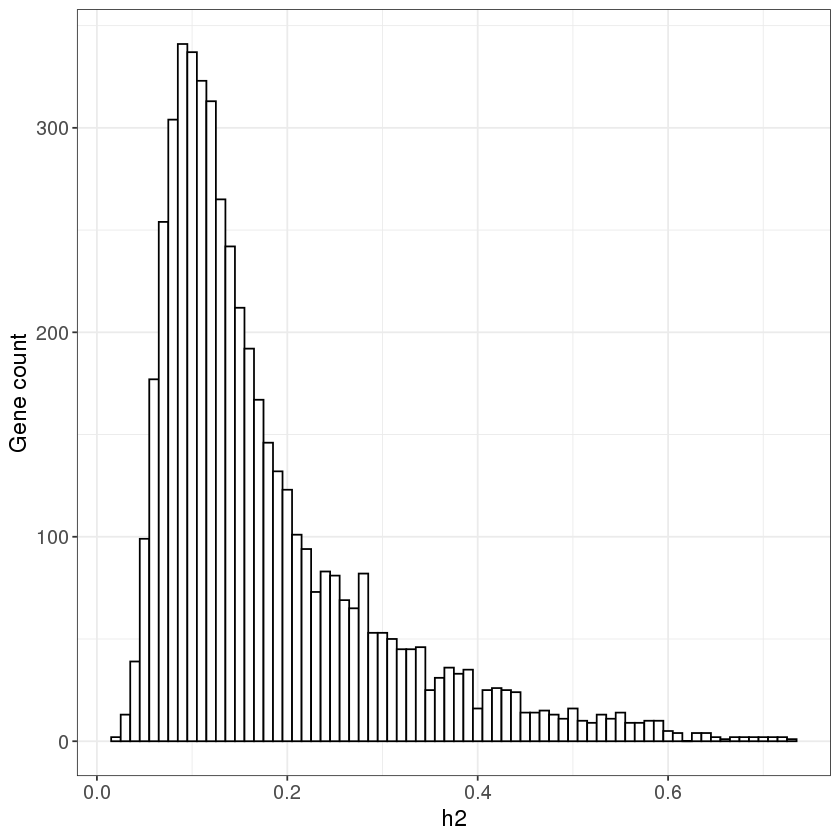

In [26]:
p2 <- ggplot(hsq_subset, aes(x=h2)) +
    geom_histogram(binwidth=0.01, color="black", fill="white") +
    theme_bw()+
    labs(x="h2", y="Gene count") +
    theme(axis.text = element_text(size=12),
          axis.title = element_text(size=14))
p2

In [27]:
sig$gene <- gsub('./WEIGHTS/','',sig$gene)

In [28]:
write.table(sig, "gene_eur_sig_pos_h2.txt", col.names=F, row.names=F, quote=F, sep="\t")